## Libraries

In [1]:
from enum import Enum
import copy
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline 

from environment import *
from mc import *
from td import *
from linearApprox import *

random.seed(1)

## Monte-Carlo Control in Easy21

Apply Monte-Carlo control to Easy21. Initialise the value function to zero. Use a time-varying scalar step-size of αt = 1/N(st,at) and an ε-greedy exploration strategy with εt = N0/(N0 + N(st)), where N0 = 100 is a constant, N(s) is the number of times that state s has been visited, and N(s,a) is the number of times that action a has been selected from state s. Feel free to choose an alternative value for N0, if it helps producing better results. Plot the optimal value function V ∗ (s) = maxa Q∗ (s, a) using similar axes to the following figure taken from Sutton and Barto’s Blackjack example.

In [2]:
mc_agent = MC_Agent(Environment(), 100)
mc_agent.train(100)

100%|██████████| 100/100 [00:00<00:00, 16650.67it/s]


In [6]:
def animate(frame):
    i = agent.iterations
    step_size = i
    step_size = max(1, step_size)
    step_size = min(step_size, 2 ** 16)
    agent.train(step_size, disable_logging=True)

    ax.clear()
    surf =  agent.plot_frame(ax)
    plt.title('MC score:%s frame:%s step_size:%s ' % (float(agent.count_wins)/agent.iterations*100, frame, step_size) )
    # plt.draw()
    fig.canvas.draw()
    return surf

MovieWriter imagemagick unavailable; using Pillow instead.


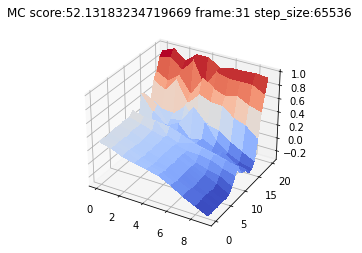

In [4]:
N0 = 100
agent = MC_Agent(Environment(), N0)
fig = plt.figure("N100")
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, animate, 32, repeat=False)

# note: requires gif writer; swap with plt.show()
ani.save('MC_Agent.gif', writer='imagemagick', fps=3)
# plt.show()

## TD Learning in Easy21

Run the algorithm with parameter values λ ∈ {0, 0.1, 0.2, ..., 1}. Stop each run after 1000 episodes
2
 
and report the mean-squared error Sums,a(Q(s, a) − Q∗(s, a))2 over all states s and actions a, comparing the true values Q∗(s,a) computed in the previous section with the estimated values Q(s, a) computed by Sarsa.

Plot the mean- squared error against λ.

100%|██████████| 1000000/1000000 [00:44<00:00, 22408.87it/s]


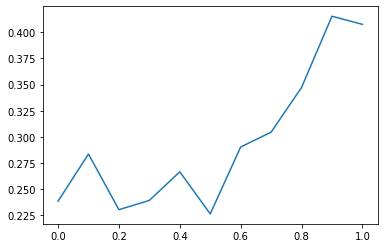

In [9]:
mc_agent = MC_Agent(Environment(), 100)
mc_agent.train(1000000)

N0 = 100
lambda_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mse_list = []
n_elements = mc_agent.Q.shape[0]*mc_agent.Q.shape[1]*2
for mlambda in lambda_list:
    agent = TD_Agent(Environment(), N0, mlambda, 1)

    agent.train(1000,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(n_elements)
    mse_list.append(mse)

fig = plt.figure("N100")
surf = plt.plot(lambda_list[0:11], mse_list[0:11])

plt.show()

For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number.

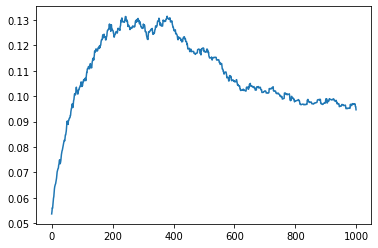

In [7]:
N0 = 100
mlambda = 0.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = TD_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("0.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

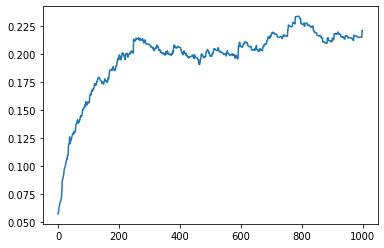

In [6]:
N0 = 100
mlambda = 1.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = TD_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("1.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

## Linear Function Approximation in Easy21

We now consider a simple value function approximator using coarse coding. Use a binary feature vector φ(s, a) with 3 ∗ 6 ∗ 2 = 36 features. Each binary feature has a value of 1 iff (s, a) lies within the cuboid of state-space corresponding to that feature, and the action corresponding to that feature. The cuboids have the following overlapping intervals:
dealer(s) = {[1, 4], [4, 7], [7, 10]}
player(s) = {[1, 6], [4, 9], [7, 12], [10, 15], [13, 18], [16, 21]}
a = {hit, stick}
where
• dealer(s) is the value of the dealer’s first card (1–10) • sum(s) is the sum of the player’s cards (1–21)
Repeat the Sarsa(λ) experiment from the previous section, but using linear value function approximation Q(s, a) = φ(s, a)⊤θ. Use a constant exploration of ε = 0.05 and a constant step-size of 0.01. Plot the mean-squared error against λ. For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number.

In [2]:
LinearAgent = Linear_Approximation_Agent(Environment(), 100,1,1)
LinearAgent.train(1000)

100%|██████████| 1000/1000 [00:00<00:00, 5045.93it/s]

49.6


MovieWriter imagemagick unavailable; using Pillow instead.


0.0
50.0
75.0
62.5
62.5
53.125
46.875
44.53125
48.4375
50.1953125
50.87890625
50.87890625
52.1484375
51.94091796875
52.1728515625
52.1636962890625
51.99432373046875
51.987457275390625
51.970418294270836
52.06413269042969
52.01995849609376
51.99864705403646
51.99018205915179
51.97162628173828
51.904635959201386
51.93893432617187
51.89000909978693
51.88585917154948
51.893733097956726
51.905713762555806
51.90338134765625
51.885986328125
51.88760196461397


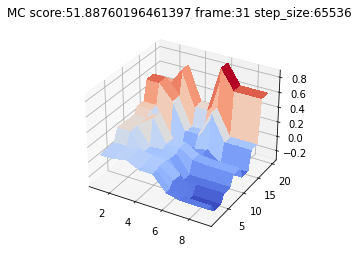

In [7]:
N0 = 100
agent = Linear_Approximation_Agent(Environment(), N0,1,1)
fig = plt.figure("N100")
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, animate, 32, repeat=False)

# note: requires gif writer; swap with plt.show()
ani.save('MC_Agent.gif', writer='imagemagick', fps=3)
# plt.show()

0.0
0.0
33.33333333333333
25.0
20.0
33.33333333333333
28.57142857142857
25.0
22.22222222222222
30.0
27.27272727272727
25.0
23.076923076923077
21.428571428571427
20.0
18.75
23.52941176470588
22.22222222222222
21.052631578947366
25.0
23.809523809523807
22.727272727272727
21.73913043478261
25.0
24.0
26.923076923076923
25.925925925925924
28.57142857142857
27.586206896551722
26.666666666666668
25.806451612903224
28.125
30.303030303030305
29.411764705882355
31.428571428571427
33.33333333333333
35.13513513513514
36.84210526315789
35.8974358974359
35.0
36.58536585365854
38.095238095238095
37.2093023255814
36.36363636363637
35.55555555555556
36.95652173913043
38.297872340425535
37.5
38.775510204081634
38.0
37.254901960784316
36.53846153846153
37.735849056603776
38.88888888888889
40.0
41.07142857142857
42.10526315789473
41.37931034482759
42.3728813559322
43.333333333333336
44.26229508196721
43.54838709677419
42.857142857142854
43.75
43.07692307692308
43.93939393939394
43.28358208955223
44.117647

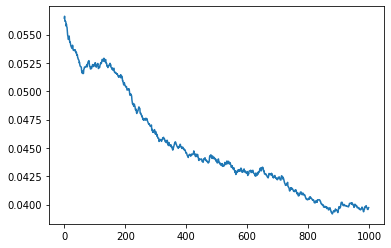

In [11]:
N0 = 100
mlambda = 0.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = Linear_Approximation_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("0.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11.11111111111111
10.0
9.090909090909092
8.333333333333332
7.6923076923076925
7.142857142857142
6.666666666666667
12.5
17.647058823529413
16.666666666666664
21.052631578947366
25.0
23.809523809523807
22.727272727272727
26.08695652173913
29.166666666666668
28.000000000000004
26.923076923076923
25.925925925925924
25.0
24.137931034482758
26.666666666666668
25.806451612903224
28.125
27.27272727272727
29.411764705882355
28.57142857142857
30.555555555555557
32.432432432432435
34.21052631578947
33.33333333333333
32.5
34.146341463414636
35.714285714285715
37.2093023255814
36.36363636363637
37.77777777777778
36.95652173913043
36.17021276595745
37.5
36.734693877551024
38.0
39.21568627450981
38.46153846153847
37.735849056603776
37.03703703703704
38.18181818181819
39.285714285714285
40.35087719298245
39.6551724137931
38.983050847457626
40.0
39.34426229508197
38.70967741935484
39.682539682539684
39.0625
40.0
40.909090909090914
40.298507462686565
41.17647058823529
40.

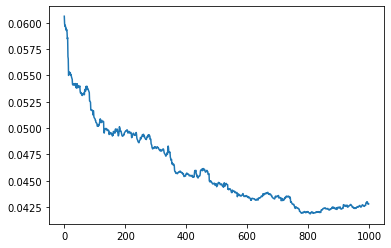

In [12]:
N0 = 100
mlambda = 1.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = Linear_Approximation_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("1.0")
surf = plt.plot( episode_number,mse_list)
plt.show()